In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Settings of the CO2 emission values corresponding to the region of manufacturing for each type of PV panel

In [7]:
# Definition of panel types and their manufacturing emission factors by country of origin (g CO2/kWh)

panel_type_factors = {
    "Monocrystalline Silicon": {
        "China": 55,
        "USA": 40,
        "Germany": 40,
        "EU Average": 38,
        "India": 60,
        "France": 30,
        "Australia": 40,
        "Japan": 43,
        "UK": 38,
        "Sweden": 24
    },
    "Polycrystalline Silicon": {
        "China": 45,
        "USA": 35,
        "Germany": 35,
        "EU Average": 33,
        "India": 52,
        "France": 24,
        "Australia": 34,
        "Japan": 36,
        "UK": 32,
        "Sweden": 21
    },
    "Thin-film (CdTe,CIGS)": {
        "China": 28,
        "USA": 20,
        "Germany": 22,
        "EU Average": 22,
        "India": 30,
        "France": 15,
        "Australia": 24,
        "Japan": 24,
        "UK": 20,
        "Sweden": 12
    },
    "Perovskite-Si Tandem": {
        "China": 33,
        "USA": 25,
        "Germany": 24,
        "EU Average": 22,
        "India": 36,
        "France": 18,
        "Australia": 25,
        "Japan": 28,
        "UK": 21,
        "Sweden": 14
    }
}

# Local grid CO2 intensity in installation location (g CO2/kWh)
grid_emission_factors = {
    "China": 550,
    "USA": 400,
    "Germany": 400,
    "EU Average": 350,
    "India": 700,
    "France": 50,
    "Australia": 600,
    "Japan": 500,
    "UK": 200,
    "Sweden": 20
}

## Asks for user input regarding the instalation 

In [31]:
# User inputs
print("Enter the following details about your PV installation:")

panel_types_list = list(panel_type_factors.keys())
print("\nSelect the PV panel type from the following options:")
for idx, val in enumerate(panel_types_list):
    print(f"{idx+1}: {val}")
panel_type_idx = int(input("Panel type (number): ")) - 1
pv_type = panel_types_list[panel_type_idx]

capacity_mw = float(input("Total installed capacity (MW): "))
annual_output = float(input("Expected annual electricity output of the PV system (kWh): "))
lifetime_years = int(input("Estimated system lifetime (years): "))

print("\nSelect manufacturing country from the following options:")
country_list = list(panel_type_factors[pv_type].keys())
for idx, val in enumerate(country_list):
    print(f"{idx+1}: {val}")
manufacturing_country_idx = int(input("Manufacturing country (number): ")) - 1
manufacturing_country = country_list[manufacturing_country_idx]
pv_emission_factor = panel_type_factors[pv_type][manufacturing_country]

print("\nSelect location of installation from the following options:")
grid_list = list(grid_emission_factors.keys())
for idx, val in enumerate(grid_list):
    print(f"{idx+1}: {val}")
installation_country_idx = int(input("Installation country (number): ")) - 1
installation_country = grid_list[installation_country_idx]
grid_emission_factor = grid_emission_factors[installation_country]

installation_year = int(input("Installation year: "))

# Calculations
lifetime_output = annual_output * lifetime_years
total_lifecycle_co2 = lifetime_output * (pv_emission_factor / 1000)   # kg CO2

annual_co2_avoided = annual_output * ((grid_emission_factor - pv_emission_factor) / 1000) # kg/year
co2_payback_time = total_lifecycle_co2 / annual_co2_avoided if annual_co2_avoided != 0 else float('inf')

Enter the following details about your PV installation:

Select the PV panel type from the following options:
1: Monocrystalline Silicon
2: Polycrystalline Silicon
3: Thin-film (CdTe,CIGS)
4: Perovskite-Si Tandem


Panel type (number):  1
Total installed capacity (MW):  3.2
Expected annual electricity output of the PV system (kWh):  3764000
Estimated system lifetime (years):  20



Select manufacturing country from the following options:
1: China
2: USA
3: Germany
4: EU Average
5: India
6: France
7: Australia
8: Japan
9: UK
10: Sweden


Manufacturing country (number):  1



Select location of installation from the following options:
1: China
2: USA
3: Germany
4: EU Average
5: India
6: France
7: Australia
8: Japan
9: UK
10: Sweden


Installation country (number):  4
Installation year:  2026


### Calculates the results and presents them in a table

In [33]:
# Results table
results = {
    'Parameter': [
        "Type of PV panel",
        "Installed capacity (MW)",
        "Annual electricity output (kWh/year)",
        "System lifetime (years)",
        "Lifetime electricity output (kWh)",
        "PV CO2 emission factor (g CO2/kWh)",
        "Grid CO2 intensity (g CO2/kWh)",
        "Total life-cycle CO2 emissions (kg)",
        "Annual CO2 avoided (kg/year)",
        "CO2 payback time (years)",
        "Installation country",
        "Manufacturing country",
        "Installation year"
    ],
    'Value': [
        pv_type,
        capacity_mw,
        annual_output,
        lifetime_years,
        lifetime_output,
        pv_emission_factor,
        grid_emission_factor,
        round(total_lifecycle_co2, 1),
        round(annual_co2_avoided, 1),
        round(co2_payback_time, 1),
        installation_country,
        manufacturing_country,
        installation_year
    ]
}
df = pd.DataFrame(results)
print("\nSummary of Results:")
display(df)


Summary of Results:


,Parameter,Value
0,Type of PV panel,Monocrystalline Silicon
1,Installed capacity (MW),3.2
2,Annual electricity output (kWh/year),3764000.0
3,System lifetime (years),20
4,Lifetime electricity output (kWh),75280000.0
5,PV CO2 emission factor (g CO2/kWh),55
6,Grid CO2 intensity (g CO2/kWh),350
7,Total life-cycle CO2 emissions (kg),4140400.0
8,Annual CO2 avoided (kg/year),1110380.0
9,CO2 payback time (years),3.7


# Plots

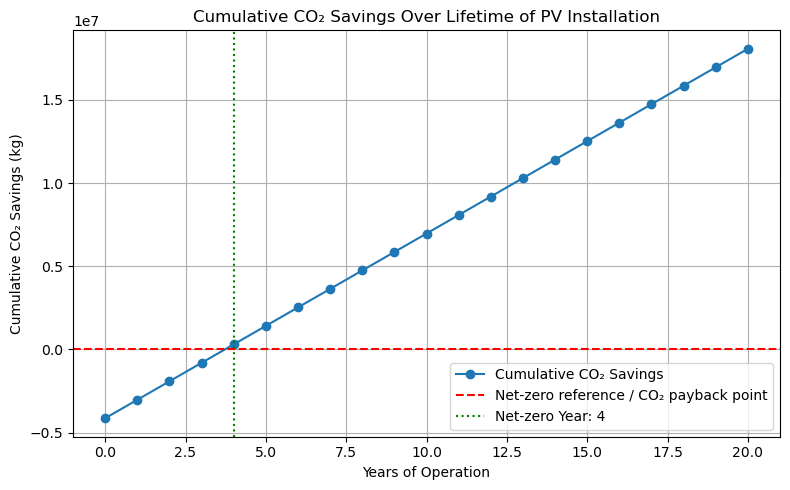

In [36]:
# --- CUMULATIVE CO2 SAVINGS PLOT ---

years = np.arange(0, lifetime_years + 1)
cumulative_savings = (annual_co2_avoided * years) - total_lifecycle_co2

plt.figure(figsize=(8, 5))
plt.plot(years, cumulative_savings, label='Cumulative CO₂ Savings', marker='o')
plt.axhline(0, color='red', linestyle='--', label='Net-zero reference / CO₂ payback point')

# Find payback year
payback_year = None
for i, value in enumerate(cumulative_savings):
    if value >= 0:
        payback_year = years[i]
        break
if payback_year is not None and 0 < payback_year < lifetime_years:
    plt.axvline(payback_year, color='green', linestyle=':', label=f'Net-zero Year: {payback_year}')

plt.xlabel('Years of Operation')
plt.ylabel('Cumulative CO₂ Savings (kg)')
plt.title('Cumulative CO₂ Savings Over Lifetime of PV Installation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

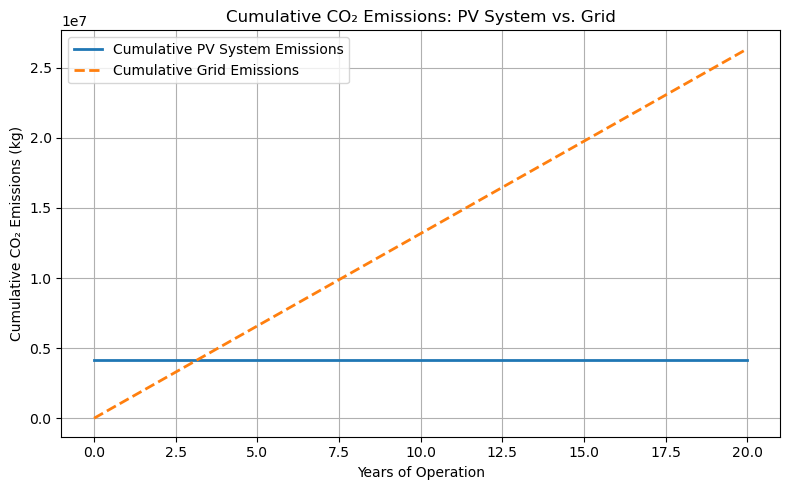

In [45]:
# Calculate cumulative emissions
years = np.arange(0, lifetime_years + 1)

# PV cumulative emissions: all emissions incurred at year 0, so flat thereafter (if only considering manufacturing and no O&M/failure/replacement)
cumulative_pv_emissions = np.full_like(years, total_lifecycle_co2, dtype=float)

# Grid cumulative emissions: grows with each year's output at grid intensity
cumulative_grid_emissions = (annual_output * grid_emission_factor / 1000) * years  # kg CO₂

plt.figure(figsize=(8, 5))
plt.plot(years, cumulative_pv_emissions, label='Cumulative PV System Emissions', linewidth=2)
plt.plot(years, cumulative_grid_emissions, label='Cumulative Grid Emissions', linewidth=2, linestyle='--')

plt.xlabel('Years of Operation')
plt.ylabel('Cumulative CO₂ Emissions (kg)')
plt.title('Cumulative CO₂ Emissions: PV System vs. Grid')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()